In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

: 

In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [ ]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), #C2
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S1
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C3
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C4
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S2
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C5
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C6
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S3
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(512, activation='relu'), #F1
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 511s 325ms/step - loss: 1.6923 - accuracy: 0.3676 - val_loss: 1.2969 - val_accuracy: 0.5365
Epoch 2/100
1563/1563 [==============================] - 491s 314ms/step - loss: 1.2823 - accuracy: 0.5386 - val_loss: 1.0656 - val_accuracy: 0.6164
Epoch 3/100
 946/1563 [=================>............] - ETA: 3:04 - loss: 1.1336 - accuracy: 0.5974

In [ ]:
aug_data = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

aug_data.fit(x_train)

from tensorflow.keras import layers, models
lenet =  keras.models.Sequential([
         keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'), 
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'), 
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),         
         keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'), 
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'), 
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),         
         keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'), 
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'), 
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),         
         keras.layers.Flatten(),
         keras.layers.Dense(512, activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(10, activation='softmax')
])

lenet.compile(optimizer='adam',  loss=keras.losses.sparse_categorical_crossentropy,  metrics=['accuracy'])

history = lenet.fit(aug_data.flow(x_train, y_train, batch_size=64), epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 41s 45ms/step - loss: 1.6948 - accuracy: 0.3987 - val_loss: 1.4141 - val_accuracy: 0.4979
Epoch 2/100
782/782 [==============================] - 33s 42ms/step - loss: 1.3146 - accuracy: 0.5338 - val_loss: 1.0922 - val_accuracy: 0.6099
Epoch 3/100
782/782 [==============================] - 32s 41ms/step - loss: 1.1283 - accuracy: 0.6027 - val_loss: 1.1641 - val_accuracy: 0.6060
Epoch 4/100
782/782 [==============================] - 33s 43ms/step - loss: 1.0146 - accuracy: 0.6470 - val_loss: 0.8511 - val_accuracy: 0.7036
Epoch 5/100
782/782 [==============================] - 34s 43ms/step - loss: 0.9382 - accuracy: 0.6774 - val_loss: 0.9887 - val_accuracy: 0.6812
Epoch 6/100
782/782 [==============================] - 32s 41ms/step - loss: 0.8777 - accuracy: 0.6979 - val_loss: 0.8713 - val_accuracy: 0.7164
Epoch 7/100
782/782 [==============================] - 33s 42ms/step - loss: 0.8282 - accuracy: 0.7175 - val_loss: 0.7144 - val_ac

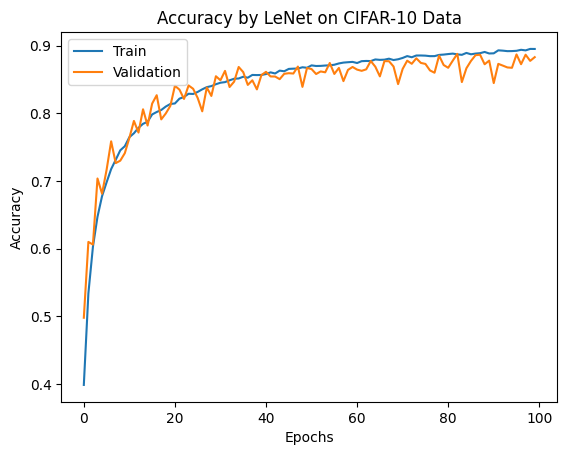

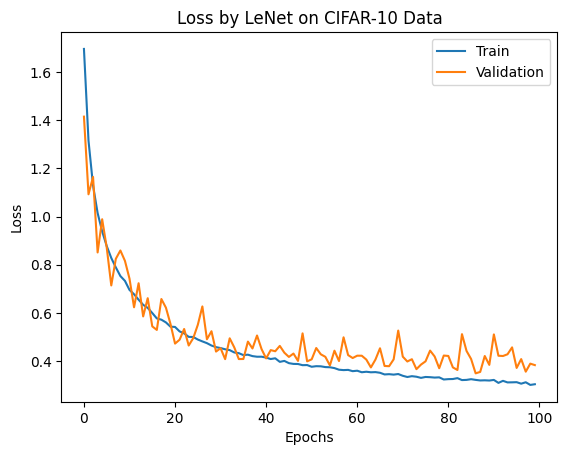

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 3ms/step


array([[859,  20,  28,   7,  15,   0,   4,   7,  31,  29],
       [  3, 964,   0,   0,   1,   0,   1,   0,   1,  30],
       [ 18,   3, 824,  16,  28,  34,  54,   9,   4,  10],
       [ 10,   7,  31, 675,  37, 104,  76,  30,   9,  21],
       [  1,   1,  19,   9, 882,  10,  49,  28,   0,   1],
       [  2,   4,  16,  49,  24, 832,  26,  35,   1,  11],
       [  3,   1,   5,   6,   6,   2, 972,   1,   1,   3],
       [  5,   0,  11,   8,  13,  11,  16, 930,   1,   5],
       [ 20,  13,   0,   2,   5,   1,   4,   2, 928,  25],
       [  1,  27,   1,   1,   1,   1,   2,   0,   4, 962]])

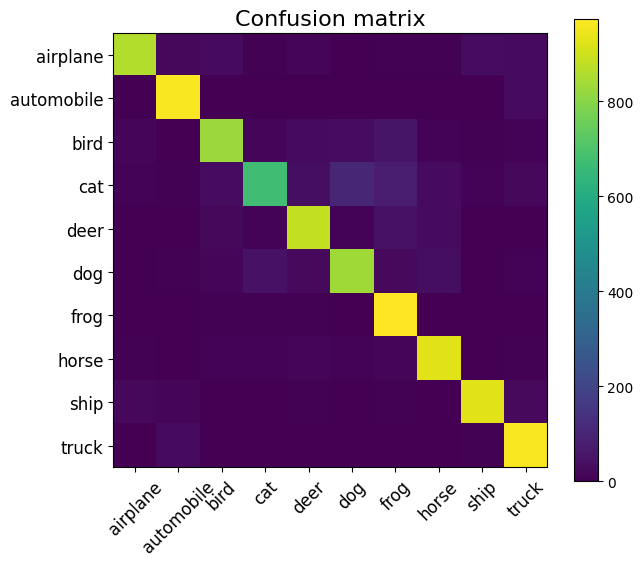

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.7809


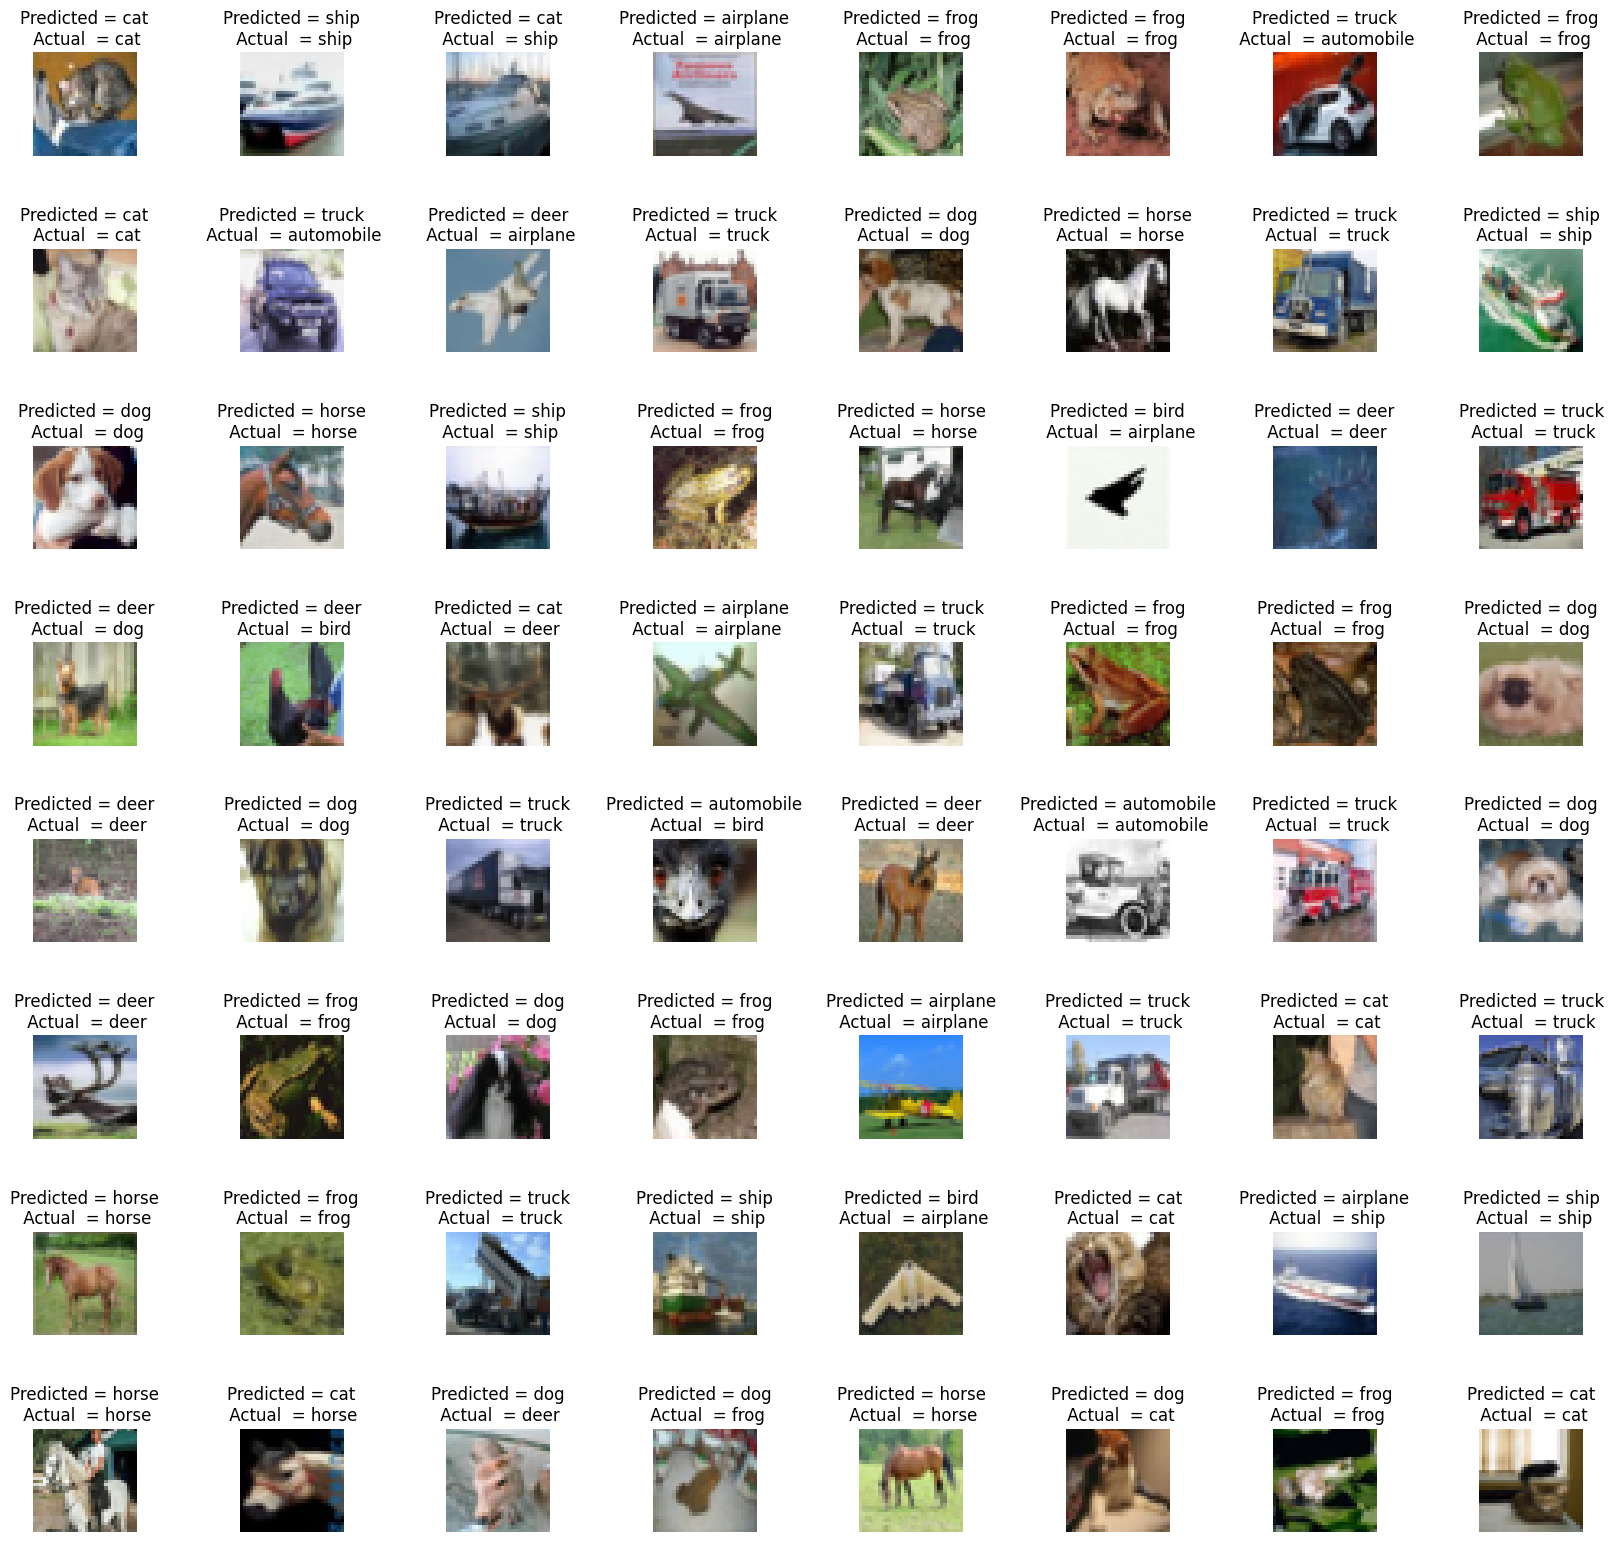

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 60)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 60)          32460     
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 2, 30)         

In [ ]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

: 

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

In [ ]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)